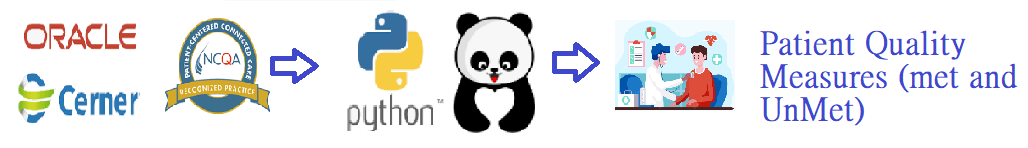

### This notebook produces the network practice provider patient quality report 
#### Joe Eberle - 3/20/2022  

In [1]:
# Import Libraries for Spreadsheet Automation 
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import date
import os, glob, time
import rpa_excel as re
import file_manager as fm 
print('Import Libraries Complete')

Import Libraries Complete


In [2]:
# select 
# DATE_PART('YEAR',SERVICE_FROM_DATE) as Service_Year
# ,PRINCIPAL_DIAGNOSIS_CODE  as Diagnosis_Code 
# ,PRINCIPAL_DIAGNOSIS_PRIMARY_DISPLAY  as Diagnosis 
# ,count(DISTINCT EMPI_ID) as Number_of_Patients
# ,count(DISTINCT CLAIM_ID) as Number_of_Claims 
# ,sum(Total_Paid_Charge) as Total_Paid_Charge 
# ,CASE 
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C00' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C14' THEN 'H&N'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C15' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C26' THEN 'GI'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C30' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C39' THEN 'Thoracic'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C40' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C41' THEN 'Bone'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C43' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C44' THEN 'Skin'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C45' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C49' THEN 'Bone'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C50' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C50' THEN 'Breast'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C51' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C58' THEN 'GYN'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C60' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C63' THEN 'Male GU'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C64' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C68' THEN 'GU'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C69' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C72' THEN 'CNS'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C73' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C75' THEN 'Endocrine'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C76' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C80' THEN 'Unspecified Malignant Location'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C81' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C96' THEN 'Blood'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C7A' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C7A' THEN 'Nuero Endicrine'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C7B' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C7B' THEN 'Nuero Endicrine'
# -- Benign 
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D00' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D09' THEN 'In Situ'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D10' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D36' THEN 'Benign'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D37' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D48' THEN 'Unspecified behavior'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D3A' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D3A' THEN 'Benign - Endocrine'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D49' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D49' THEN 'Unspecified Benign behaviour'
# ELSE 'Unknown Cancer' 
# END as Cancer_Service_Line
# ,CASE 
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C00' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C14' THEN 'Malignant neoplasms of Lip, Oral Cavity, and Pharynx'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C15' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C26' THEN 'Malignant neoplasms of digestive organs'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C30' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C39' THEN 'Malignant neoplasms of resperatory and intrathorcic organs'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C40' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C41' THEN 'Malignant neoplasms of bone and articular cartilage'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C43' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C44' THEN 'Melonoma and other malignant neoplasms of skin'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C45' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C49' THEN 'Malignant neoplasms of mesothelial and other soft tissue'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C50' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C50' THEN 'Malignant neoplasms of breast'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C51' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C58' THEN 'Malignant neoplasms of female genital organs'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C60' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C63' THEN 'Malignant neoplasms of male genital organs'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C64' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C68' THEN 'Malignant neoplasms of urinary tract'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C69' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C72' THEN 'Malignant neoplasms of eye, brain, and other CNS'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C73' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C75' THEN 'Malignant neoplasms of thyroid and other endocrine glands'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C76' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C80' THEN 'Malignant neoplasms of ill-defined, secondary, and unspecified'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C81' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C96' THEN 'Malignant neoplasms of lymphoid, homopoetic, and related tissue'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C7A' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C7A' THEN 'Malignant nueroendicrine tumors'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C7B' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C7B' THEN 'Secondary nueroendicrine tumors'
# -- Benign 
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D00' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D09' THEN 'In Situ neoplasms'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D10' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D36' THEN 'Benign neoplasms, except nueroendicrine tumors'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D37' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D48' THEN 'Neoplasms of uncertain behvior, polyscethemia and mylodysplastic'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D3A' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D3A' THEN 'Benign nueroendicrine tumors'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D49' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D49' THEN 'Neoplasms of unspecified behavior'
# ELSE 'Unknown Cancer' 
# END as Cancer_Category
# ,CASE 
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C00' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C14' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C15' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C26' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C30' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C39' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C40' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C41' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C43' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C44' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C45' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C49' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C50' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C50' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C51' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C58' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C60' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C63' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C64' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C68' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C69' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C72' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C73' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C75' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C76' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C80' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C81' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C96' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C7A' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C7A' THEN 'Malignant'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'C7B' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'C7B' THEN 'Malignant'
# -- Benign 
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D00' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D09' THEN 'In Situ'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D10' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D36' THEN 'Benign'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D37' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D48' THEN 'Neoplasms of uncertain behavior'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D3A' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D3A' THEN 'Benign'
# WHEN LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) >= 'D49' AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) <= 'D49' THEN 'Neoplasms of uncertain behavior'
# ELSE 'Unknown State' 
# END as Cancer_State
# from PH_F_ANNOTATED_CLAIM 
# WHERE DATE_PART('YEAR',SERVICE_FROM_DATE) >=  2018
# --WHERE DATE_PART('YEAR',SERVICE_FROM_DATE) =  2022 
# AND (LEFT(PRINCIPAL_DIAGNOSIS_CODE,1) IN ('C')
# OR  LEFT(PRINCIPAL_DIAGNOSIS_CODE,1) IN ('D'))
# AND LEFT(PRINCIPAL_DIAGNOSIS_CODE,3) < 'D50'
# GROUP BY Service_Year, Diagnosis_Code, Diagnosis
# ORDER BY Number_of_Patients DESC 

## Optional Step 0 - initiate the configuration parser and name the solution

In [3]:
# Configure the code and visual settings to have consistency 
import configparser
config = configparser.ConfigParser()
config.read('config.ini') 

solution_name = 'patient_measures'
current_working_directory = os.getcwd()

## Optional Step 0 - initiate the logger 

In [ ]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_Start(solution_name, start_time) 

## Step 1 - Read the data in 

In [ ]:
# Read in the CSV SQL output for on measures at the Patient Detail level 
Raw_Data_File_Name  = config.get('patient_measures', 'extract_file')
print(f'Loading file:{Raw_Data_File_Name}')
patient_measures = pd.read_excel(Raw_Data_File_Name)
logging.info(f'{solution_name} Step 1 - Load the Data - Loaded {patient_measures.shape[0]} rows.')
print(f'Step 1 - Load the Data - Loaded {patient_measures.shape[0]} rows with {patient_measures.shape[1]} columns.\n')
print(patient_measures.columns)

In [ ]:
def get_percent_complete(qualified,met):
    return round(((met / qualified) * 100),1) if qualified > 0 else 0.0

testing_and_developing = True
if testing_and_developing:
    print(f'Testing formula get_percent_complete {get_percent_complete(100,23)}')

In [ ]:
def get_diff(baseline, percent_complete):
    return round(baseline - percent_complete,1) if baseline > 0 else 0

testing_and_developing = True
if testing_and_developing:
    print(f'Testing formula get_diff {get_diff(95.3,23)}')

In [ ]:
def get_patient_count_to_goal(denominator, percent_difference):
    return int(denominator * (percent_difference * 0.01))  if percent_difference > 0 else 0

testing_and_developing = True
if testing_and_developing:
    print(f'Testing formula get_patient_count_to_goal {get_patient_count_to_goal(5,20)}')
    print(f'Testing formula get_patient_count_to_goal {get_patient_count_to_goal(5,65)}')
    print(f'Testing formula get_patient_count_to_goal {get_patient_count_to_goal(3122,14.2)}')    

In [ ]:
def get_baseline(measure):
    baseline = 85.0
    if measure == 'Breast Cancer Screening':
        baseline = 83.0
    elif  measure == 'Colorectal Cancer Screening':
        baseline = 85.36 
    elif  measure == 'Blood Pressure < 140/90 mm Hg':
        baseline = 85.0 
    elif  measure == 'Tobacco Use Screening':
        baseline = 97.11        
    elif  measure == 'Diabetes Care: Eye Exam':
        baseline = 78.0   
    elif  measure == 'Diabetes Care: EGFR':
        baseline = 97.0    
    elif  measure == 'Diabetes Care: HbA1c Poor Control > 9%':
        baseline = 85.0 
    elif  measure == 'Cervical Cancer Screening':
        baseline = 85.36        
    elif  measure == 'Tobacco User Cessation Intervention':
        baseline = 97.11 
    elif  measure == 'Adult Depression Screening':
        baseline = 88.61    
    elif  measure == 'Fall Risk Screening':
        baseline = 91.00    
    elif  measure == 'Advanced Care Plan':
        baseline = 43.84    
    elif  measure == 'Influenza Vaccination':
        baseline = 79.00  
    elif  measure == 'Falls Plan of Care':
        baseline = 91.00       
    elif  measure == 'Adolescent Depression Screening':
        baseline = 88.61           
    else: 
        baseline = 85.0
    return baseline

testing_and_developing = True
if testing_and_developing:
    print(f'Testing formula get_baseline {get_baseline("Falls Plan of Care")}')

In [ ]:
# Simplify the output 
patient_measures = patient_measures[['PROVIDER_NETWORK', 'PRACTICE_LOCATION', 'PROVIDER_NAME',
       'ROLL_UP_PCP_NAME', 'PATIENT_NAME', 'MEASURE_NAME_SIMPLIFIED',
       'TOTAL_MEASURE_COUNT', 'TOTAL_NOT_MET_COUNT', 'TOTAL_MET_COUNT',
       'BIRTH_DATE', 'AGE_YEARS', 'GENDER', 'PHONE_NUMBER', 'MARA_RISK_SCORE',
       'PATIENT_EMPI_ID', 'MEASURE_QUALIFIED_NAME',
       'PAYER_PLAN_SOURCE_ENROLLED', 'PAYER_PLAN_SOURCE_EMR',
       'MEASURE_BASELINE', 'MEASURE_ORDER']]

patient_measures.sort_values(['PROVIDER_NETWORK', 'PRACTICE_LOCATION', 'PROVIDER_NAME'
                              ,'PATIENT_NAME','MEASURE_ORDER'])

patient_measures.rename(columns={'PROVIDER_NETWORK' : 'Network', 
                                     'PRACTICE_LOCATION': 'Practice',
                                     'MEASURE_NAME_SIMPLIFIED' : 'Measure',
                                     'TOTAL_MEASURE_COUNT' : 'Denominator',
                                     'TOTAL_NOT_MET_COUNT' : 'Not_Met',
                                     'TOTAL_MET_COUNT' : 'Met'}, inplace = True)
# Simplify the output 
patient_measures.head(5) 
 

## Step 2 - Reversing Polarity on Reverse Polarity Measures

In [ ]:
def reverse_polarity(measure, met):
    lmet = met
    if measure == 'Diabetes Care: HbA1c Poor Control > 9%':
        if met == 0:
            lmet = 1 
        else: 
            lmet = 0
    return lmet

testing_and_developing = True 
if testing_and_developing:
    print(f'Testing formula reverse_polarity {reverse_polarity("Diabetes Care: HbA1c Poor Control > 9%",0)}')
    print(f'Testing formula reverse_polarity {reverse_polarity("Diabetes Care: HbA1c Poor Control > 9%",1)}')    
    print(f'Testing formula reverse_polarity {reverse_polarity("Diabetes Care: efgr",1)}')     

In [ ]:
logging.info(f'{solution_name} Step 2 - Reverse polarity of specific revese polarization measures.')
patient_measures['Met'] = patient_measures.apply(lambda x: reverse_polarity( x['Measure'], x['Met']), axis=1)        
patient_measures['Not_Met'] = patient_measures.apply(lambda x: reverse_polarity( x['Measure'], x['Not_Met']), axis=1)  

In [ ]:
patient_measures['age_group'] = pd.cut(patient_measures.AGE_YEARS,bins=[0,2,17,65,1000],labels=['Toddler-Baby','Child','Adult','Elderly'])
patient_measures['risk_group'] = pd.cut(patient_measures.MARA_RISK_SCORE,bins=[0,1,2,3,1000],labels=['Very Low Risk','Low Risk','High Risk','Very High Risk'], ordered=False)
patient_measures.columns

In [ ]:
for index, measure in enumerate(patient_measures['Measure'].unique()):
    print(index, measure)

In [ ]:
patient_measures = patient_measures[['Network', 'Practice', 'PROVIDER_NAME', 'ROLL_UP_PCP_NAME',
       'PATIENT_NAME', 'Measure', 'Denominator', 'Not_Met', 'Met',
       'BIRTH_DATE', 'AGE_YEARS', 'GENDER', 'PHONE_NUMBER', 'MARA_RISK_SCORE',
       'PAYER_PLAN_SOURCE_ENROLLED', 'PAYER_PLAN_SOURCE_EMR',
       'MEASURE_BASELINE', 'MEASURE_ORDER', 'age_group', 'risk_group',
       'PATIENT_EMPI_ID', 'MEASURE_QUALIFIED_NAME']]


In [ ]:
# The following function creates chunks of data into individual spreadsheets ... based upon organization name 
def Chunk_Data_Into_Reports(practice):
    df_practice_panel = patient_measures[(patient_measures.Practice == practice)] 
    report_name = '_Patient_Measures'
    path_to_excel = config.get('patient_measures', 'working_directory')
    data_rows = len(df_practice_panel) - 1 
    print(f'Practice Name:{practice} Rows:{data_rows}')    
    logging.info(f'{solution_name} Step 3 - Practice Name:{practice} Rows:{data_rows}')
  
    if data_rows > 2:
        spread_name = practice
        if spread_name == '':
            spread_name = 'No_ORG_NAME_'  
        spread_name =   spread_name.replace(' ','_')  
       
        df_practice_panel_sum = df_practice_panel.rename(columns={'PATIENT_NAME':'Denominator'})
        df_practice_measure = df_practice_panel_sum.groupby(['Measure'], as_index = False)['Denominator','Met','Not_Met'].sum() 
        df_practice_measure['percent_complete_%'] = df_practice_measure.apply(lambda x: get_percent_complete( x['Denominator'], x['Met']), axis=1)
        df_practice_measure['measure_goal_%'] = df_practice_measure.apply(lambda x: get_baseline( x['Measure']), axis=1)
        df_practice_measure['distance_to_goal_%'] = df_practice_measure.apply(lambda x: get_diff( x['measure_goal_%'], x['percent_complete_%']), axis=1)
        df_practice_measure['patient_count_to_goal'] = df_practice_measure.apply(lambda x: get_patient_count_to_goal( x['Denominator'], x['distance_to_goal_%']), axis=1)

        df_provider_summary = df_practice_panel_sum.groupby(['PROVIDER_NAME'], as_index = False)['Denominator','Met','Not_Met'].sum() 
        df_provider_summary['percent_complete_%'] = df_provider_summary.apply(lambda x: get_percent_complete( x['Denominator'], x['Met']), axis=1)
        
        df_network_practice_provider_summary = df_practice_panel_sum.groupby(['PROVIDER_NAME','Measure'], as_index = False)['Denominator','Met','Not_Met'].sum() 
        df_network_practice_provider_summary['percent_complete_%'] = df_network_practice_provider_summary.apply(lambda x: get_percent_complete( x['Denominator'], x['Met']), axis=1)
        df_network_practice_provider_summary['measure_goal_%'] = df_network_practice_provider_summary.apply(lambda x: get_baseline( x['Measure']), axis=1)
        df_network_practice_provider_summary['distance_to_goal_%'] = df_network_practice_provider_summary.apply(lambda x: get_diff( x['measure_goal_%'], x['percent_complete_%']), axis=1)        
        df_network_practice_provider_summary['patient_count_to_goal'] = df_network_practice_provider_summary.apply(lambda x: get_patient_count_to_goal( x['Denominator'], x['distance_to_goal_%']), axis=1)
        
        df_network_practice_ru_provider_summary = df_practice_panel_sum.groupby(['ROLL_UP_PCP_NAME','Measure'], as_index = False)['Denominator','Met','Not_Met'].sum()         
        df_network_practice_ru_provider_summary['percent_complete_%'] = df_network_practice_ru_provider_summary.apply(lambda x: get_percent_complete( x['Denominator'], x['Met']), axis=1)
        df_network_practice_ru_provider_summary['measure_goal_%'] = df_network_practice_ru_provider_summary.apply(lambda x: get_baseline( x['Measure']), axis=1)
        df_network_practice_ru_provider_summary['distance_to_goal_%'] = df_network_practice_ru_provider_summary.apply(lambda x: get_diff( x['measure_goal_%'], x['percent_complete_%']), axis=1)        
        df_network_practice_ru_provider_summary['patient_count_to_goal'] = df_network_practice_ru_provider_summary.apply(lambda x: get_patient_count_to_goal( x['Denominator'], x['distance_to_goal_%']), axis=1)
        
        path_to_excel = config.get('provider_quality', 'working_directory')
        report_name = '_Provider_Quality'        
        filename = path_to_excel + '\\' + spread_name + report_name + '.xlsx'
        print(f'File:{filename} Data Rows:{df_practice_measure.shape[0]}')          
        with pd.ExcelWriter(filename, engine='openpyxl') as writer:
            df_practice_measure.to_excel(writer, 'Practice Measure' , index=False )
            df_provider_summary.to_excel(writer, 'Provider Summary' , index=False) 
            df_network_practice_provider_summary.to_excel(writer, 'Provider Measure' , index=False)             
            df_network_practice_ru_provider_summary.to_excel(writer, 'Roll Up PCP Measure' , index=False)             

            # Chunk the roll up providers into their own tabs
            ru_providers = df_network_practice_ru_provider_summary['ROLL_UP_PCP_NAME'].unique()
            for provider in ru_providers:
                df_provider_score_card = df_network_practice_ru_provider_summary[(df_network_practice_ru_provider_summary['ROLL_UP_PCP_NAME'] == provider)] 
                df_provider_score_card.to_excel(writer, ('rollup-'+ provider) , index=False)             

            # Chunk the roll up providers into their own tabs    
            providers = df_network_practice_provider_summary['PROVIDER_NAME'].unique()
            for provider in providers:
                df_provider_score_card = df_network_practice_provider_summary[(df_network_practice_provider_summary['PROVIDER_NAME'] == provider)] 
                df_provider_score_card.to_excel(writer, provider, index=False) 
                
            df_gaps_in_care = patient_measures[(patient_measures.Met == 0)] 
            df_gaps_in_care = df_gaps_in_care[['PROVIDER_NAME', 'ROLL_UP_PCP_NAME',
       'PATIENT_NAME', 'Measure', 'Met', 'BIRTH_DATE', 'AGE_YEARS', 'GENDER', 'PHONE_NUMBER', 'MARA_RISK_SCORE',
        'age_group', 'risk_group']]                
                
                
                
# config.set('quality_reporting', 'practice_quality', 'C:\working_directory\quality_reporting\practice_quality')  
# config.set('quality_reporting', 'patient_measures', 'C:\working_directory\quality_reporting\patient_measures')  
# config.set('quality_reporting', 'gaps_in_care', 'C:\working_directory\quality_reporting\gaps_in_care')                  
        # Write out the patient Measures Detail Report         
        path_to_excel = config.get('patient_measures', 'working_directory')
        report_name = '_Patient_Measures'        
        filename = path_to_excel + '\\' + spread_name + report_name + '.xlsx'
        print(f'File:{filename} Data Rows:{df_practice_measure.shape[0]}')          
        with pd.ExcelWriter(filename, engine='openpyxl') as writer: 
            df_practice_panel.to_excel(writer, 'Patient Measure Detail' , index=False )
             
        # Write out the patientgaps in care Detail Report    
        path_to_excel = config.get('patient_measures', 'working_directory')        
        report_name = '_Patient_Gaps_in_Care'        
        filename = path_to_excel + '\\' + spread_name + report_name + '.xlsx'
        print(f'File:{filename} Data Rows:{df_practice_measure.shape[0]}')          
        with pd.ExcelWriter(filename, engine='openpyxl') as writer:                
            df_gaps_in_care.to_excel(writer, 'Gaps in Care' , index=False )            
 
           
        return practice

In [ ]:
logging.info(f'{solution_name} Step 3 - chunk the network report into individual practice reports.')

for practice in patient_measures.Practice.unique():
    Chunk_Data_Into_Reports(practice)    

## Step 3 - Prettify and format all the reports

# logging.info(f'{solution_name} Step 4 - prettify and format all reports rows.')
testing = True
if testing:
    formatted_excel_Files = re.format_excel_directory(config.get('patient_measures', 'working_directory'),'quality_report')
    print(f'Formatted #{formatted_excel_Files} excel files') 

## Step 4 - Distribute the reports to the point of impact

In [ ]:
path = config.get('patient_measures', 'working_directory')
target_dir = config.get('patient_measures', 'target_directory')
extension = 'xlsx'
file_content = '_ft'
status = fm.copy_specific_files(path, extension, target_dir, file_content)
print(status) 

In [ ]:
# Calculate and classify the process performance 
os.chdir(current_working_directory) # Remove this Later - Reset the working directory
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

In [ ]:
# --  Network Provider Patient Demographic Report  -- Patient Measures
# with network as 
# (
# select 
# ORG_CLASS_NAME as provider_network
# ,provider_group.ORG_Name as practice_location
# ,provider.PRSNL_NAME as provider_name
# ,PH_D_PERSONNEL_AlIAS.prsnl_alias_id  as Provider_NPI
# ,provider.prsnl_id   
# ,(initcap(provider_fist_name) || ' '  || initcap(provider_last_name_legal_name))  as Roll_Up_PCP_Name
# ,roster.sponsoring_physician_npi as Roll_Up_PCP_NPI 
# ,roster.practice_tin as Practice_Tax_ID  
# FROM PH_D_ORGANIZATION_CLASS class 
# Join PH_D_ORGANIZATION_ORGANIZATION_CLASS_RELTN on class.ORG_CLASS_ID = PH_D_ORGANIZATION_ORGANIZATION_CLASS_RELTN.ORG_CLASS_ID
# join PH_D_ORGANIZATION provider_group on provider_group.org_id = PH_D_ORGANIZATION_ORGANIZATION_CLASS_RELTN.org_id 
# join PH_D_ORGANIZATION_PERSONNEL_RELTN reltn on provider_group.org_id = reltn.org_id  
# join PH_D_PERSONNEL provider on  reltn.prsnl_id = provider.prsnl_id
# left join PH_D_PERSONNEL_AlIAS on  provider.prsnl_id = PH_D_PERSONNEL_AlIAS.prsnl_id join DS_REFERENCE.REFERENCE_SCHEMA.DS_CURRENT_GLIN_ROSTER roster on PH_D_PERSONNEL_AlIAS.prsnl_alias_id = roster.PROVIDER_NPI
# left join REFERENCE.NPPES_provider on roster.sponsoring_physician_npi = NPPES_provider.npi
# where 
# ORG_CLASS_NAME IN ('General Physician PC') and provider_group.ORG_Name IN ('GPPC PCP Depew Transit','GPPC PCP Buffalo Main')  and 
# PRSNL_ALIAS_TYPE = 'SPI'
# ), organization_provider_panel as
# (
# select 
# max(network.provider_network) as provider_network
# ,max(network.practice_location) as practice_location
# ,max(network.provider_name) as provider_name
# ,att.empi_ID 
# ,max(network.Provider_NPI) as  Provider_NPI
# ,max(case when (network.Roll_Up_PCP_Name is Null) THEN network.provider_name ELSE network.Roll_Up_PCP_Name END) as Roll_Up_PCP_Name -- set roll up to themselves if null 
# ,max(case when (network.Roll_Up_PCP_NPI is Null) THEN network.Provider_NPI ELSE network.Roll_Up_PCP_NPI END) as Roll_Up_PCP_NPI  -- set roll up to themselves if null  
# from network  
# join ph_f_attribution att on network.prsnl_id = att.prsnl_id
# WHERE att.population_ID = (select  population_id  from wny.PH_D_POPULATION Where name = 'WNY Population')
# GROUP BY att.empi_ID 
# ), attributed_patient as 
# (
# select distinct EMPI_ID  from organization_provider_panel 
# ), patient as                                    --  select * from temp_treated 
# (SELECT 
# TRIM(INITCAP(PT.Family_Name1) || ', ' || INITCAP(PT.Given_Name1) || ' ' || INITCAP(nvl(PT.Given_Name2,'')))  as Patient_Name  
# ,PT.BIRTH_DATE as Birth_date
# ,age_in_years(current_date, PT.BIRTH_DATE::Date) AS Age_Years
# ,age_in_years(current_date, PT.BIRTH_DATE::Date)||' Years '||date_part('DOY',PT.BIRTH_DATE::Date)::int||' Days ' as Age 
# ,CASE WHEN PTG.Gender ilike '%Unknown%' THEN 'Unknown'
# WHEN PTG.Gender ilike '%unspec%' THEN 'Unknown'
# when PTG.Gender ilike '%un%' then 'Unknown'
# WHEN PTG.Gender is null then 'Unknown'
# WHEN PTG.Gender ilike '%FA%' THEN 'Female'
# WHEN PTG.Gender ilike '%fem%' THEN 'Female'
# when PTG.Gender ilike '%masc%' THEN 'Male'
# WHEN PTG.Gender ilike 'Male%' THEN 'Male'
# WHEN PTG.Gender ilike '%other%' THEN 'Unknown'
# ELSE PTG.Gender END AS Patient_Gender 
# ,PT.deceased as Deceased
# ,PT.DECEASED_DT_TM as Deceased_Date
# ,REGEXP_REPLACE(PT.phone_number, '[^0-9]','') AS Phone
# ,(select max(normalized_total_score) from WNY.PH_F_RISK_SCORE a where model_name = 'CXCONLAG0' AND a.EMPI_ID = AL.EMPI_ID) as MARA_Risk_Score  
# ,PT.EMPI_ID 
# FROM  attributed_patient AL
# LEFT JOIN WNY.PH_D_PERSON PT ON AL.EMPI_ID = PT.EMPI_ID 
# LEFT JOIN (select distinct empi_id, coalesce(gender_primary_display, gender_display, gender_code) AS Gender FROM PH_D_PERSON) PTG ON AL.EMPI_ID = PTG.EMPI_ID 
# WHERE PT.population_ID = (select  population_id  from wny.PH_D_POPULATION Where name = 'WNY Population')
# )
# , patient_coverage as
# (
# select 
# att.EMPI_ID 
# ,max(cov.payer_name || '^' || cov.plan_name || '^' || cov.source_description ) as  payer_plan_source_enrolled
# ,max(Active_medical_PBC_IND) as Active_medical_PBC_IND
# ,max(END_DT_TM) as Coverage_End_Date
# from attributed_patient att
# LEFT JOIN wny.ph_f_person_benefit_coverage cov ON att.EMPI_ID = cov.EMPI_ID 
# where source_type = 'ENROLLMENT'
# AND PAYER_NAME IS NOT NULL 
# AND END_DT_TM > '2022-01-01 00:00:00'
# group by att.EMPI_ID  
# )
# , patient_coverage_emr as
# (
# select 
# att.EMPI_ID 
# ,max(cov.payer_name || '^' || cov.plan_name || '^' || cov.source_description ) as  payer_plan_source_emr
# ,max(Active_medical_PBC_IND) as Active_medical_PBC_IND
# ,max(END_DT_TM) as Coverage_End_Date
# from attributed_patient att
# LEFT JOIN wny.ph_f_person_benefit_coverage cov ON att.EMPI_ID = cov.EMPI_ID 
# where source_type <> 'ENROLLMENT'
# AND PAYER_NAME IS NOT NULL 
# AND END_DT_TM > '2022-01-01 00:00:00'
# group by att.EMPI_ID  
# )
# , patient_detail as 
# (
# select 
# opp.provider_network
# ,opp.practice_location
# ,opp.provider_name
# ,opp.empi_ID as patient_id
# ,opp.Provider_NPI 
# ,opp.Roll_Up_PCP_Name  
# ,opp.Roll_Up_PCP_NPI  
# ,pat.*
# ,case 
# when pat.Age_Years <= 17 then '(0-17 yrs)' 
# when pat.Age_Years <= 64 then '(18-64 yrs)' 
# when pat.Age_Years <= 120 then '(>=65 yrs)' 
# else 'Unknown Age' 
# end as Age_Category 
# ,cov.payer_plan_source_enrolled as payer_plan_source_enrolled
# ,covemr.payer_plan_source_emr as payer_plan_source_emr
# ,cov.Active_medical_PBC_IND
# ,cov.Coverage_End_Date
# from organization_provider_panel opp 
# left join patient pat on pat.empi_id = opp.EMPI_ID 
# left join patient_coverage cov on cov.empi_id = opp.EMPI_ID
# left join patient_coverage_emr covemr on covemr.empi_id = opp.EMPI_ID 
# )
# , Annual_Wellness_Visit as 
# (
# select EMPI_ID as Patient_ID 
# , max(service_start_date) as Last_AWV_Date
# , max(procedure_code) as AWV_Procedure_Code
# , max(source_description) as AWV_Source_Description 
# , DATEDIFF( DAY,  max(service_start_date),  CURRENT_DATE() ) as Days_Since_AWV 
# from WNY.PH_F_PROCEDURE  
# where  
# procedure_code IN 
# ('99381','99382','99383','99384','99385','99386','99387' 
# ,'99391','99392','99393','99394','99395','99396','99396'
# ,'G0402','G0438','G0439') 
# AND year(service_start_dt_tm) in (2023,2022,2021,2020,2019)
# AND EMPI_ID in (Select EMPI_ID from attributed_patient)
# Group by EMPI_ID  
# )
# , measure_outcomes as 
# (select 
# al.provider_network as provider_network
# ,al.practice_location as practice_location
# ,al.provider_name  as provider_name 
# ,al.Roll_Up_PCP_Name as Roll_Up_PCP_Name 
# ,al.Patient_Name 
# ,mo.fully_qualified_name as Measure_Qualified_Name
# ,case 
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/breast-cancer-screening' then 'Breast Cancer Screening'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/advance-care-plan' Then 'Advanced Care Plan'
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/annual-eye-exam' Then 'Diabetes Care: Eye Exam' 
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/hba1c-poorly-controlled-hba1c-gt-9' Then 'Diabetes Care: HbA1c Poor Control > 9%'
# when mo.fully_qualified_name = 'cernerstandard.chronickidney.clinical/glomerular-filtration-rate-measure' Then 'Diabetes Care: EGFR'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/cervical-cancer-screening' Then 'Cervical Cancer Screening'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening' Then 'Colorectal Cancer Screening'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/fall-risk-screening' Then 'Fall Risk Screening'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/falls-plan-of-care' Then 'Falls Plan of Care'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-use-screening' Then 'Tobacco Use Screening'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-user-and-cessation-intervention' Then 'Tobacco User Cessation Intervention'
# when mo.fully_qualified_name = 'cernerstandard.seniorwellness.org2014.clinical/influenza-vaccination-current-season' Then 'Influenza Vaccination'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/depression-screening' Then 'Adult Depression Screening'
# when mo.fully_qualified_name = 'cernerstandard.adolescentwellness.clinical/depression-screening' Then 'Adolescent Depression Screening'
# when mo.fully_qualified_name = 'cernerstandard.hypertension.org2014.clinical/bp-less-than-140-90' Then 'Blood Pressure < 140/90 mm Hg'
# else mo.fully_qualified_name
# end as Measure_Name_Simplified 
# ,case 
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/breast-cancer-screening' then 83.0
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/advance-care-plan' Then 43.84
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/annual-eye-exam' Then 78.00 
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/hba1c-poorly-controlled-hba1c-gt-9' Then 15.00
# when mo.fully_qualified_name = 'cernerstandard.chronickidney.clinical/glomerular-filtration-rate-measure' Then 97.00
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/cervical-cancer-screening' Then 85.36
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening' Then 80.0
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/fall-risk-screening' Then 91.00
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/falls-plan-of-care' Then 91.00
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-use-screening' Then 97.11
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-user-and-cessation-intervention' Then 97.11
# when mo.fully_qualified_name = 'cernerstandard.seniorwellness.org2014.clinical/influenza-vaccination-current-season' Then 79.00
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/depression-screening' Then 88.61
# when mo.fully_qualified_name = 'cernerstandard.adolescentwellness.clinical/depression-screening' Then 88.61
# when mo.fully_qualified_name = 'cernerstandard.hypertension.org2014.clinical/bp-less-than-140-90' Then 83.65
# else 0.00
# end as Measure_Baseline 
# ,case 
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/breast-cancer-screening' then 1
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening' Then 2
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/cervical-cancer-screening' Then 3
# when mo.fully_qualified_name = 'cernerstandard.hypertension.org2014.clinical/bp-less-than-140-90' Then 4
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-use-screening' Then 5
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-user-and-cessation-intervention' Then 6
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/fall-risk-screening' Then 7
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/falls-plan-of-care' Then 8
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/advance-care-plan' Then 9
# when mo.fully_qualified_name = 'cernerstandard.seniorwellness.org2014.clinical/influenza-vaccination-current-season' Then 10
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/depression-screening' Then 11
# when mo.fully_qualified_name = 'cernerstandard.adolescentwellness.clinical/depression-screening' Then 12
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/annual-eye-exam' Then 13
# when mo.fully_qualified_name = 'cernerstandard.chronickidney.clinical/glomerular-filtration-rate-measure' Then 14
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/hba1c-poorly-controlled-hba1c-gt-9' Then 15
# else 0 
# end as Measure_Order 
# ,CASE when pgrp.program_group_id is null then 'Analytics Only' else 'Registries Face Up' end as Is_Registries_Measure 
# ,COUNT(DISTINCT mo.empi_id) as Total_Measure_Count
# ,COUNT(DISTINCT CASE when state IN ('NOT_MET_DATA_AVAILABLE','NOT_MET_NO_DATA','NOT_MET') then mo.empi_Id end) as Total_Not_Met_Count 
# ,COUNT(DISTINCT CASE when state IN ('MET') then mo.empi_Id end) as Total_Met_Count
# ,max(p.BIRTH_DATE) as Birth_Date 
# ,age_in_years(current_date, max(p.BIRTH_DATE)::Date) AS Age_Years
# ,max(p.GENDER_DISPLAY) as Gender
# ,max(p.PHONE_NUMBER) as Phone_Number
# ,max(al.MARA_Risk_Score) as MARA_Risk_Score
# ,max(p.EMPI_ID) as Patient_EMPI_ID
# ,max(al.payer_plan_source_enrolled) as payer_plan_source_enrolled
# ,max(al.payer_plan_source_emr) as payer_plan_source_emr
# ,mo.Due_date as Measure_Due_Date
# ,mo.EVENT_DATE as Measure_Event_Date
# from ph_f_measure_outcome mo
# Join PH_D_PERSON p  On mo.empi_id = p.empi_id 
#   And mo.population_id = p.population_id 
#   And (p.deceased is null or p.deceased = 'false')
# join patient_detail al On mo.empi_id = al.empi_id  -- NOTE  al stands for attributed lives 
# Left Join (select program_group_id from PH_D_PROGRAM_GROUP where program_group_description = 'healthe-registries') pgrp
# On mo.program_group_id = pgrp.program_group_id Where state in('NOT_MET_NO_DATA','NOT_MET_DATA_AVAILABLE','MET','NOT_MET')  
# AND  
# ( mo.fully_qualified_name IN 
# ('cernerstandard.comprehensiveadultwellness.clinical/breast-cancer-screening'
# ,'cernerstandard.comprehensiveadultwellness.clinical/cervical-cancer-screening'
# ,'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening'
# ,'cernerstandard.comprehensiveadultwellness.clinical/fall-risk-screening'
# ,'cernerstandard.comprehensiveadultwellness.clinical/falls-plan-of-care'
# ,'cernerstandard.comprehensiveadultwellness.clinical/tobacco-use-screening'
# ,'cernerstandard.comprehensiveadultwellness.clinical/tobacco-user-and-cessation-intervention' 
# ,'cernerstandard.comprehensiveadultwellness.clinical/advance-care-plan'
# ,'cernerstandard.seniorwellness.org2014.clinical/influenza-vaccination-current-season'
# ,'cernerstandard.comprehensiveadultwellness.clinical/depression-screening' 
# ,'cernerstandard.adolescentwellness.clinical/depression-screening'
# ,'cernerstandard.chronickidney.clinical/glomerular-filtration-rate-measure'
# )
# OR 
# (mo.fully_qualified_name IN 
# ('cernerstandard.diabetesmellitus.org2014.clinical/annual-eye-exam'
# ,'cernerstandard.diabetesmellitus.org2014.clinical/hba1c-poorly-controlled-hba1c-gt-9'
# ) AND ((age_in_years(current_date, p.BIRTH_DATE::Date) >= 18) AND  (age_in_years(current_date, p.BIRTH_DATE::Date) <= 75)) 
# )
# OR 
# (mo.fully_qualified_name IN 
# ('cernerstandard.hypertension.org2014.clinical/bp-less-than-140-90'
# ) AND ((age_in_years(current_date, p.BIRTH_DATE::Date) >= 18) AND  (age_in_years(current_date, p.BIRTH_DATE::Date) <= 85)) 
# ) 
# )
# And mo.POPULATION_ID = 'a69329ea-d5a0-439c-8ef8-aa8b2f816206'
# AND pgrp.program_group_id is null 
# group by provider_network,practice_location,provider_name,Roll_Up_PCP_Name,Patient_Name,Measure_Qualified_Name,Measure_Name_Simplified,pgrp.program_group_id,Measure_Due_Date,Measure_Event_Date   
# ) , Patient_Measures  as
# (
# select 
# mo.provider_network,mo.practice_location,mo.provider_name,mo.Roll_Up_PCP_Name,mo.Patient_Name 
# ,mo.Measure_Name_Simplified 
# ,mo.Total_Measure_Count, mo.Total_Not_Met_Count, mo.Total_Met_Count 
# ,mo.Birth_Date 
# ,age_in_years(current_date, mo.Birth_Date::Date) AS Age_Years
# -- , age_in_years(current_date, mo.Birth_Date::Date)||' Years '||date_part('DOY',mo.Birth_Date::Date)::int||' Days ' as Age 
# ,mo.Gender
# ,mo.Phone_Number
# ,mo.MARA_Risk_Score
# ,mo.Patient_EMPI_ID
# ,mo.Measure_Qualified_Name
# ,mo.payer_plan_source_enrolled
# ,mo.payer_plan_source_emr
# ,mo.measure_baseline
# ,mo.measure_order 
# from measure_outcomes  mo
# where mo.Is_Registries_Measure = 'Analytics Only'
# ) 
# -- select * from patient_detail
# select * from  Patient_Measures 
# order by 
# provider_network, practice_location, provider_name 
# ,Roll_Up_PCP_Name, Patient_Name, Measure_Order 


In [ ]:
# df_practice_panel = patient_measures[(patient_measures.Practice == 'GPPC PCP Buffalo Main')] 
# df_practice_panel_sum = df_practice_panel.rename(columns={'PATIENT_NAME':''})

# # df_practice_panel.shape
# # df_network_practice_provider_summary = df_practice_panel_sum.groupby(['Network', 'Practice','PROVIDER_NAME','Measure'], as_index = False)['TOTAL_MEASURE_COUNT','Met','Not_Met'].sum() 
# # df_network_practice_provider_summary['percent_complete'] = df_network_practice_provider_summary.apply(lambda x: get_percent_complete( x['TOTAL_MEASURE_COUNT'], x['Met']), axis=1)        

# df_network_practice_provider_summary = df_practice_panel_sum.groupby(['Network','Measure'], as_index = False)['Denominator','Met','Not_Met'].sum() 
# df_network_practice_provider_summary['percent_complete_%'] = df_network_practice_provider_summary.apply(lambda x: get_percent_complete( x['Denominator'], x['Met']), axis=1)        


In [ ]:
# df_network_practice_provider_summary = df_practice_panel_sum.groupby(['Network', 'Practice','PROVIDER_NAME','Measure'], as_index = False)['Denominator','Met','Not_Met'].sum() 
# df_network_practice_provider_summary['percent_complete_%'] = df_network_practice_provider_summary.apply(lambda x: get_percent_complete( x['Denominator'], x['Met']), axis=1)        
# # df_network_practice_provider_summary.loc['total']= df_network_practice_provider_summary.sum()

# df_network_practice_provider_summary.head(25)

In [ ]:
# df_pvt_network_practice_provider_summary =  pd.pivot(df_network_practice_provider_summary
#                                                          ,index = ['Network', 'Practice','PROVIDER_NAME','Measure']
#                                                          ,columns = ['TOTAL_MEASURE_COUNT','Met','percent_complete'])

# df_pvt_network_practice_provider_summary =  pd.pivot(df_network_practice_provider_summary
#                                                          ,index = ['Network', 'Practice','PROVIDER_NAME','Measure'] 
#                                                          ,columns = ['Measure'])   

# df_pvt_network_practice_provider_summary.head(10)

In [ ]:
# # df_uniques = pd.melt(frame=df_network_practice_provider_summary, value_vars=['PROVIDER_NAME', 'Measure'])
# df_uniques = pd.melt(frame=df_network_practice_provider_summary, value_vars=['Measure'])
# df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
#                                               'value'])['value'].count()) \
#     .sort_index(level=[0, 1]) \
#     .rename(columns={'value': 'count'}) \
#     .reset_index()

# sns.factorplot(x='variable', y='count', hue='value', 
#                data=df_uniques, kind='bar', size=12);


In [ ]:
# # Add the additional summary tabs for org class, organization, and Provider total quality, and Organization total Quality 
# extension = 'xlsx'
# print(path)
# os.chdir(path)

# files = glob.glob('*.{}'.format(extension))

# for x in range(len(files)): 
# #    print(files[x]) 
#     file_path = Path_to_Excel + files[x]
#     print (file_path)
#     writer = pd.ExcelWriter(file_path, engine='openpyxl', mode='a')
#     writer.book = load_workbook(file_path)

#     Organizational_Class_Metric_Data.to_excel(writer,sheet_name='Network Metrics', index = False)
#     Organizational_Total_Quality_Data.to_excel(writer,sheet_name='Practice Total Quality', index = False) 
#     Organization_Metric_Summary.to_excel(writer,sheet_name='Practice Metrics', index = False)     
#     Provider_Total_Quality_Data.to_excel(writer,sheet_name='Provider Total Quality', index = False)
   
#     writer.save()
#     writer.close()